In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']='NanumGothic'

plt.rc('axes', unicode_minus=False)

from mpl_toolkits import mplot3d
import seaborn  as sns
import datetime 

In [2]:
movie = pd.read_csv('https://raw.githubusercontent.com/statkwon/ESC-Visualization/master/2nd_Week/movies.csv')

In [3]:
epl = pd.read_csv('https://raw.githubusercontent.com/statkwon/ESC-Visualization/master/2nd_Week/epl.csv')

In [4]:
epl2 = pd.read_csv('https://raw.githubusercontent.com/statkwon/ESC-Visualization/master/2nd_Week/epl2.csv')

In [5]:
movie = movie.dropna(axis=0) #감독별 흥행도 비교
movie.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.00,2,262,4,233211


In [6]:
from mpl_toolkits import mplot3d

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
C:\Users\82107\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82107\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82107\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82107\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82107\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82107\anaconda3\lib\site-packages\matp

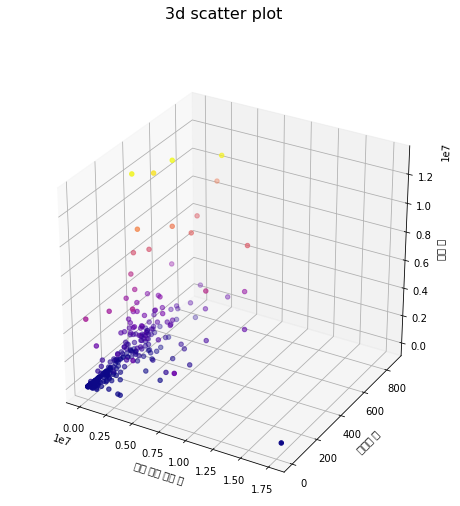

In [7]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d') #도화지 그려주기 
ax.scatter3D(movie['dir_prev_bfnum'], movie['num_staff'], movie['box_off_num'], c=movie['box_off_num'], cmap='plasma')
#3D scatter #cmap 색깔 지정

ax.set_xlabel('이전 영화 관객 수')
ax.set_ylabel('스태프 수')
ax.set_zlabel('관객 수', rotation=90)
fig.suptitle('3d scatter plot', fontsize=16)
plt.show()


In [8]:
#시본 사용시 코드 간결해짐.
#figure(큰 틀) 와 axes(하나하나의 칸)


epl.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


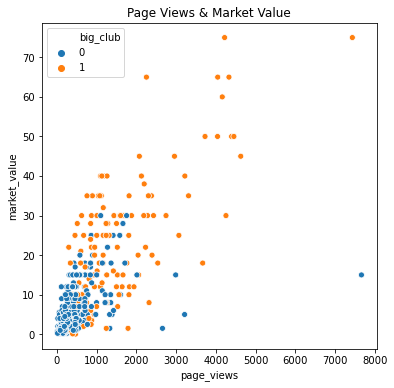

In [9]:
#하나의 ax에 할당되는 듯

fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x='page_views', y='market_value', data=epl, hue='big_club')
ax.set_title('Page Views & Market Value')
plt.show()

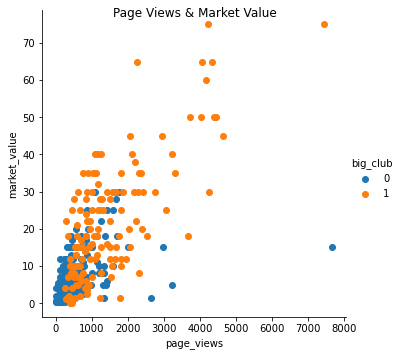

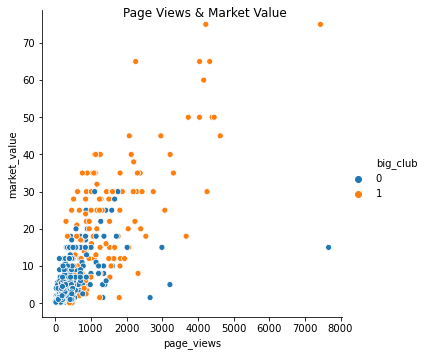

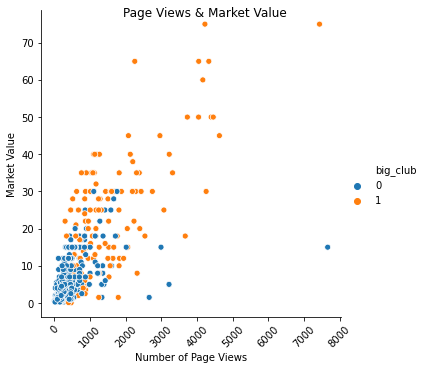

In [10]:
#Facetgrid(1) - 격자무늬, 빈 도화지 형태의 큰 도화지만 형성

#matplotlib 사용해서 facetgrid에 입혀주기.
a = sns.FacetGrid(data=epl, hue='big_club', height=5)
a.map(plt.scatter, 'page_views', 'market_value').add_legend()
a.fig.suptitle('Page Views & Market Value')
plt.show()

#Facetgrid(2)
#replot & catplot
#kind = 희망하는 plot. 입력하면 facetgrid object 형태로 입력.
#여러개 플롯 그리기 쉬움. 
#다수의 명령어 사용 불가.
a = sns.relplot(x='page_views', y='market_value', data=epl, kind='scatter', hue='big_club')
a.fig.suptitle('Page Views & Market Value')
plt.show()

#가장 많이 사용하는것.
a = sns.relplot(x='page_views', y='market_value', data=epl, kind='scatter', hue='big_club', height=5, aspect=1)
a.fig.suptitle('Page Views & Market Value')
a.set_xlabels('Number of Page Views')
a.set_ylabels('Market Value')
a.set_xticklabels(rotation=45)
plt.show()

In [11]:

epl2 = epl2[(epl2['tournament']=='Premier League') & (epl2['season'].isin(['2018/2019', '2019/2020']))].reset_index(drop=True)

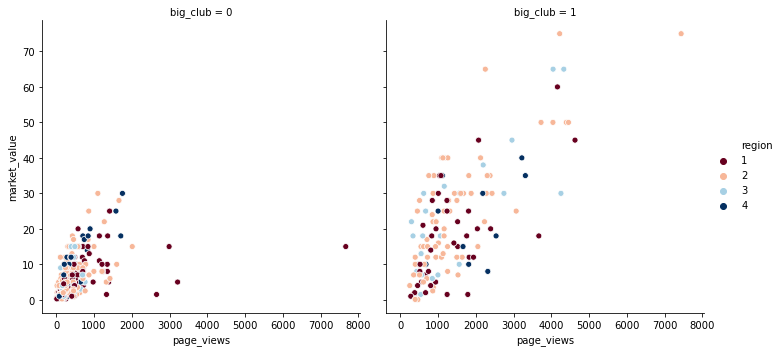

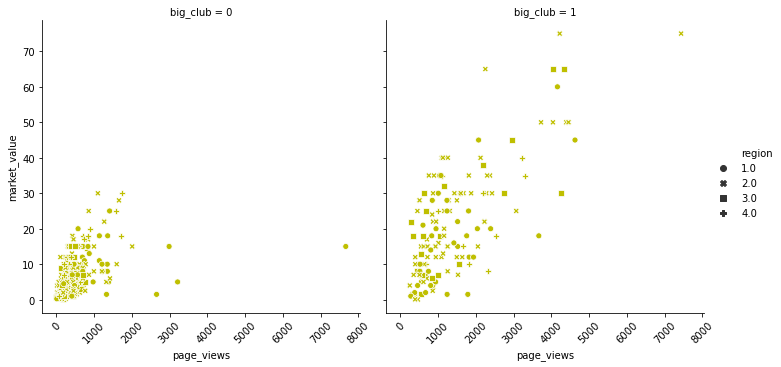

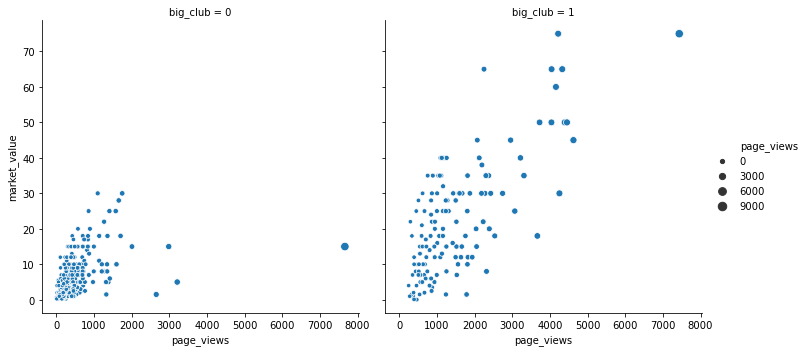

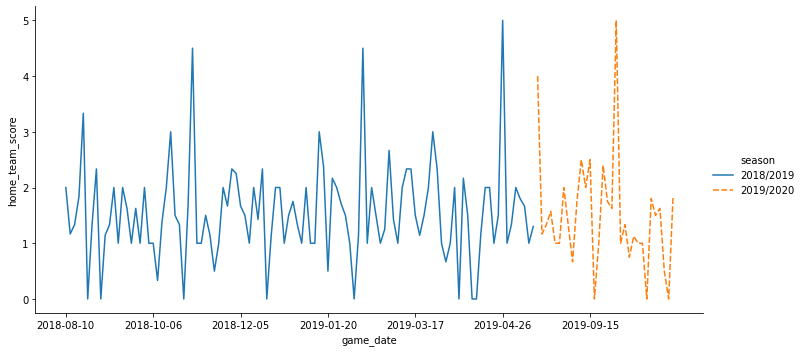

In [12]:
#Relational plot - replot. / scatter & lineplot만 있음. 
sns.relplot(x='page_views', y='market_value', data=epl, kind='scatter', hue='region', col='big_club', palette='RdBu')
plt.show()

# scatter plot

#hue =점들의 색깔 구분할 수 있게 함. 
#col (columns) = 칼럼 나눌 수 있음
#palette= 색상 변경 가능.

a = sns.relplot(x='page_views', y='market_value', data=epl, kind='scatter', style='region', col='big_club', color='y')
a.set_xticklabels(rotation=45)
plt.show()

sns.relplot(x='page_views', y='market_value', data=epl, kind='scatter', size='page_views', col='big_club')
plt.show()

# line plot. 

a = sns.relplot(x='game_date', y='home_team_score', data=epl2, kind='line', hue='season', style='season', ci=None, aspect=2)
a.set_xticklabels(step=20)
plt.show()

#aspect 와 height 조절하면서 Plot 크기 조절 가능. 
#step = xticklabels 중 표현하고 싶은 것만. (datetime 모듈에만 사용 가능. )


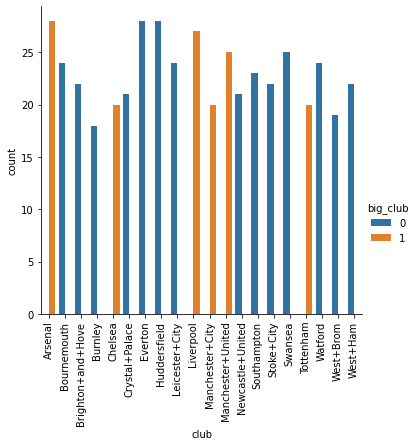

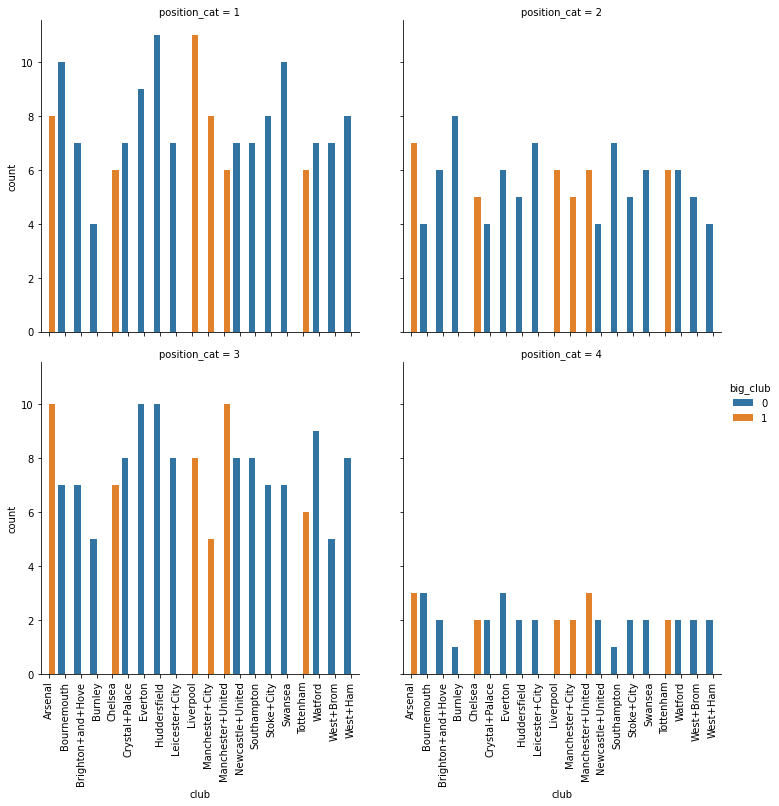

In [13]:
#Catplot

a = sns.catplot(x='club', data=epl, kind='count', hue='big_club')
a.set_xticklabels(rotation=90)
plt.show()

#countplot ( kind = 'count')

a = sns.catplot(x='club', data=epl, kind='count', hue='big_club', col='position_cat', col_wrap=2)
a.set_xticklabels(rotation=90)
plt.show()

#col_wrap = 한 열에 최대 몇개까지 그래프를 그릴지 설명할 수 있음. 


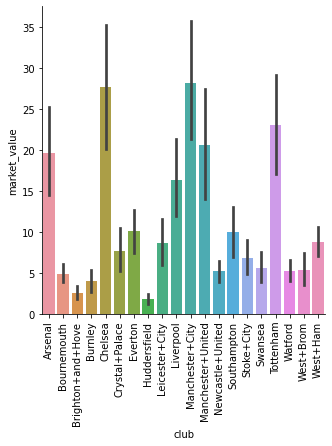

In [14]:
#Barplot

a = sns.catplot(x='club', y='market_value', data=epl, kind='bar')
a.set_xticklabels(rotation=90)
plt.show()

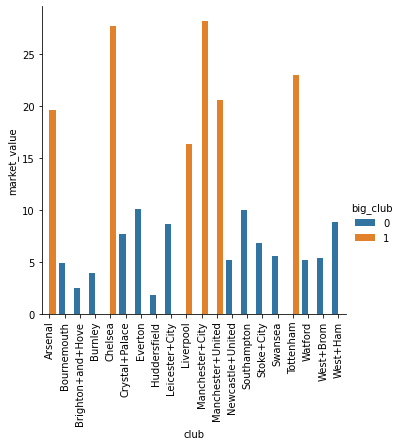

In [15]:
a = sns.catplot(x='club', y='market_value', data=epl, kind='bar', ci=None, hue='big_club')
a.set_xticklabels(rotation=90)
plt.show()

#ci = None; error 삭제, confidence interval 지우는 명령어. 

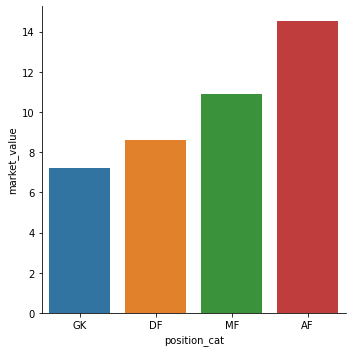

In [16]:
#order, xticklabels = 직접 수동으로 수정 가능 
a = sns.catplot(x='position_cat', y='market_value', data=epl, kind='bar', ci=None, order=[4, 3, 2, 1])
a.set_xticklabels(['GK', 'DF', 'MF', 'AF'])
plt.show()

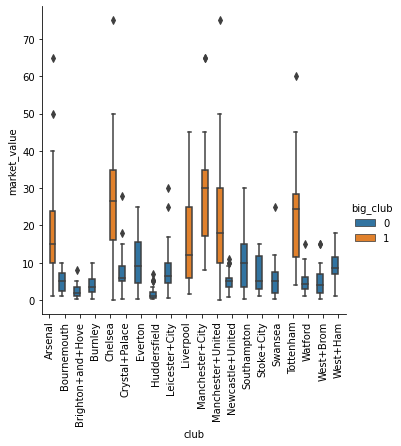

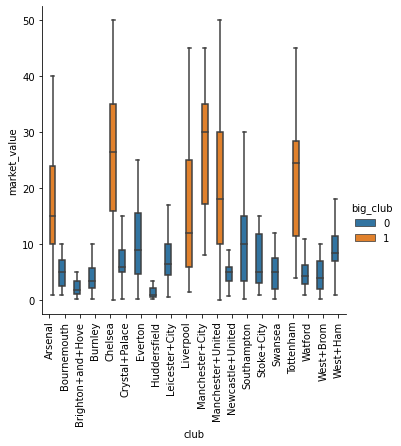

In [17]:
#Boxplot

a = sns.catplot(x='club', y='market_value', data=epl, kind='box', hue='big_club')
a.set_xticklabels(rotation=90)
plt.show()

a = sns.catplot(x='club', y='market_value', data=epl, kind='box', hue='big_club', sym='')
a.set_xticklabels(rotation=90)
plt.show()

#sym ='' ; outlier 표시 안한다.

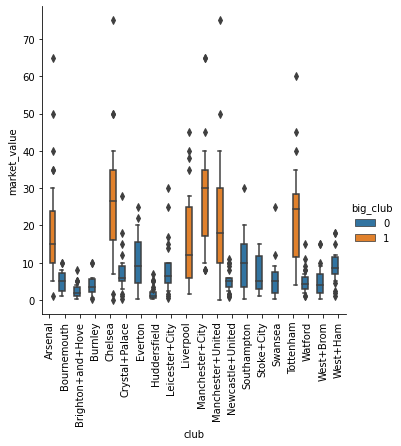

In [18]:
a = sns.catplot(x='club', y='market_value', data=epl, kind='box', hue='big_club', whis=0.5)
a.set_xticklabels(rotation=90)
plt.show()

#whis = 1.5인데 0.5로 바꿔주면 outlier 늘어남.


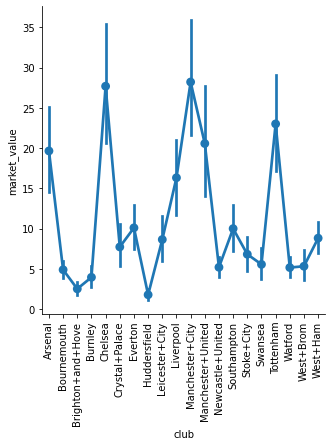

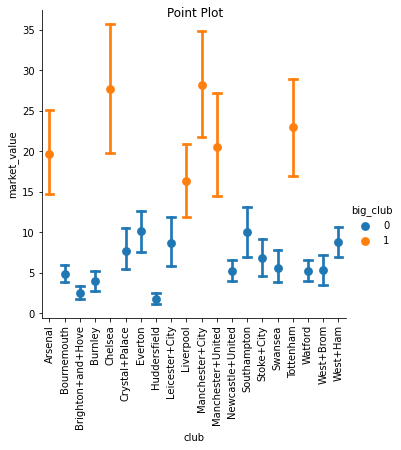

In [19]:
#pointplot

a = sns.catplot(x='club', y='market_value', data=epl, kind='point')
a.set_xticklabels(rotation=90)
plt.show()

#capsize, join = False = 선 없어짐.
a = sns.catplot(x='club', y='market_value', data=epl, kind='point', hue='big_club', capsize=0.5, join=False)
a.set_xticklabels(rotation=90)
a.fig.suptitle('Point Plot')
plt.show()



C:\Users\82107\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82107\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82107\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82107\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82107\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46988 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82107\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48520 missing from c

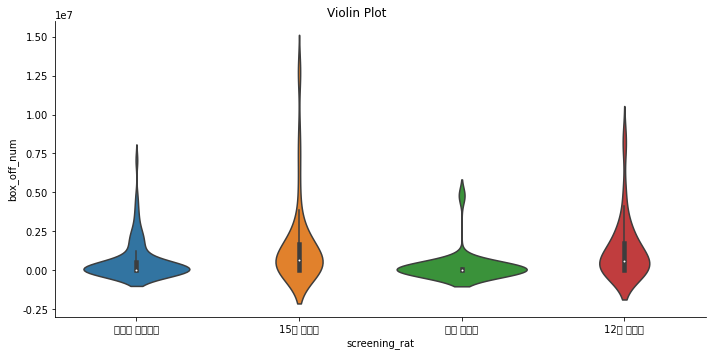

In [20]:
#violin plot
#안에 자그맣게 박스플랏
#분포의 개형 개략적으로 같이 보여줌. 
#
a = sns.catplot(x='screening_rat', y='box_off_num', data=movie, kind='violin', aspect=2)
a.fig.suptitle('Violin Plot')
plt.show()

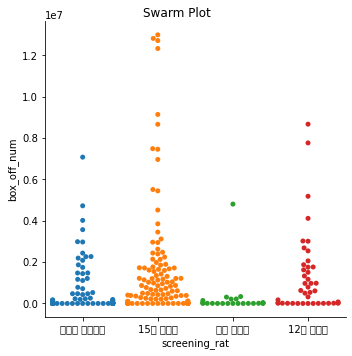

In [21]:
#Swarm plot
#점들이 얼마만큼 모여있냐.

a = sns.catplot(x='screening_rat', y='box_off_num', data=movie, kind='swarm')
a.fig.suptitle('Swarm Plot')
plt.show()

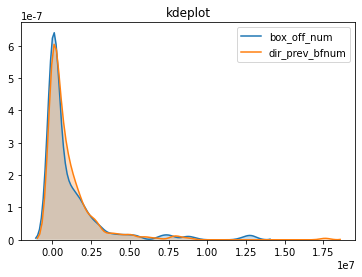

In [22]:
#Kernel-Density plot
#조금 부드럽게 이어지는 형태. 

fig, ax = plt.subplots() #하면 좋고..아니면 말고 xtitle, ylabel 해도 편하게 되니까.
sns.kdeplot(data=movie['box_off_num'], shade=True)
sns.kdeplot(data=movie['dir_prev_bfnum'], shade=True)
ax.set_title('kdeplot')
plt.show()

#하나의 ax에 겹쳐서 그려진 형태. 
#shade = True ; 안에 색 칠해진다. 

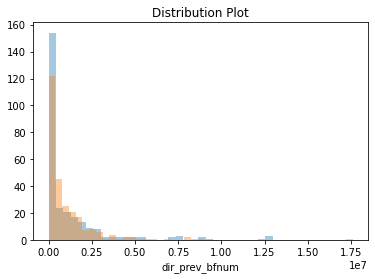

In [23]:
#Distribution plot ; 그냥 히스토그램. 

fig, ax = plt.subplots()
sns.distplot(movie['box_off_num'], kde=False)
sns.distplot(movie['dir_prev_bfnum'], kde=False)
ax.set_title('Distribution Plot')
plt.show()

#kde=False 안하면 kernel density plot이 같이 나옴. 

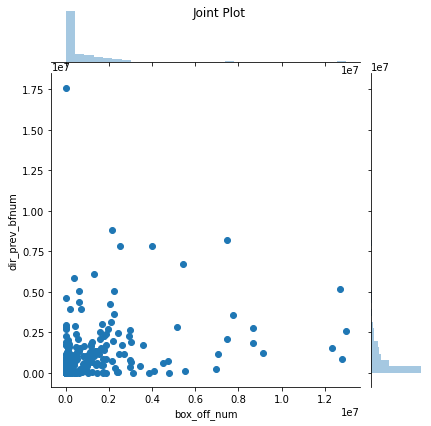

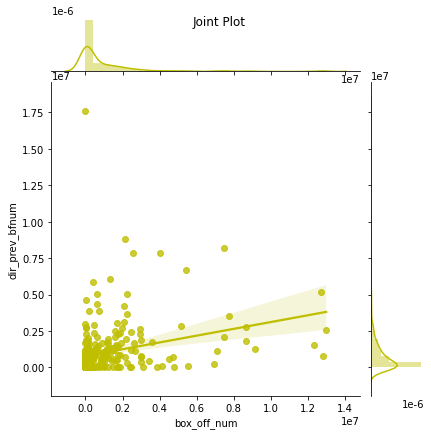

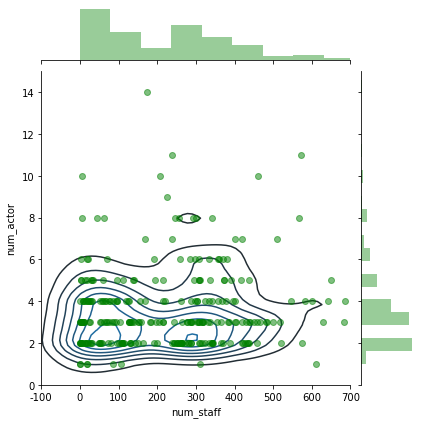

In [24]:
#Joint plot
#1차원 데이터가 아닌 2차원에서의 데이터 분포를 확인하는. 

a = sns.jointplot(x='box_off_num', y='dir_prev_bfnum', data=movie)
a.fig.suptitle('Joint Plot')
plt.show()

a = sns.jointplot(x='box_off_num', y='dir_prev_bfnum', data=movie, kind='reg', color='y')
a.fig.suptitle('Joint Plot')
plt.show()

#a.fig.suptitle = 가장 큰 타이틀. 
#kind = reg ; regression line, interval까지.

#alpha = 투명도 조절
#a.plot_joint(sns.kdeplot, zorder=0, n_levels=7)
#그 안에서 새로운 플롯 그릴 수 있음. 
#ax로 반환한게 아니라, joint grid 이기 때문에 명령어가 조금 달라진다 .
#이차원 상공분포 확인 가능. 

a = sns.jointplot(x=movie['num_staff'], y=movie['num_actor'], alpha=0.5, data=movie, color='g')
a.plot_joint(sns.kdeplot, zorder=0, n_levels=7)
a.ax_joint.set_xlim(-100, 700)
a.ax_joint.set_ylim(0, 15)
plt.show()

C:\Users\82107\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82107\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82107\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82107\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82107\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46988 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82107\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48520 missing from c

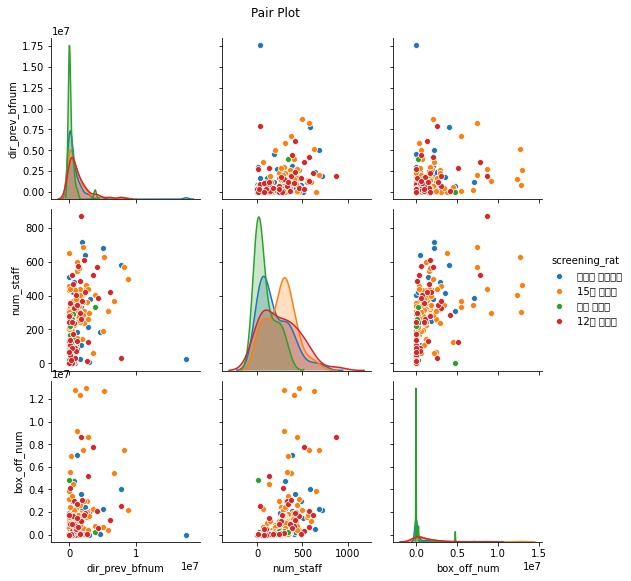

In [25]:
#Pair plot
#R에서는 pairs. 
#hue 에 맞춰서 색이 변하고
#grid 계열에 여러가지. 여태까지는 facetgrid. 이친구는 fair grid. 그래서 a.fig.suptitle 바로 사용 가능.
#그런데 위에서는 a.ax_joint.set_xlim
#diag.
#marker
#alpha

a = sns.pairplot(data=movie[['dir_prev_bfnum', 'num_staff', 'box_off_num', 'screening_rat']], hue='screening_rat')
a.fig.suptitle('Pair Plot', x=0.43, y=1.05)
plt.show()

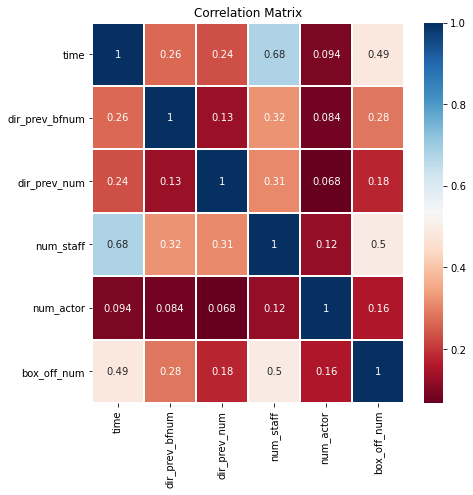

In [26]:
#heat map 
#상관계수 행렬 시각화
#더 관계가 크면 색으로 표현
#cmap에다가 RdBu 지정, 다른걸로 해도 상관 무 

fig, ax = plt.subplots(figsize=(7, 7))
a = sns.heatmap(movie.corr(),annot = True, linewidths=1, cmap='RdBu')
ax.set_title('Correlation Matrix')
plt.show()

#linewidths = 1 사각형 사이의 간격
#movie.corr() 행렬로 내줘야함

In [27]:
#pairplot 명령어 꿀팁
#diag_kind = ' ___'
#plot_kws = {'alpha':0.5, 's': 80, 'edgecolor':'k'}
# dias_kws = {'alpha':0.3}
#(kws = keyword arguments)
#pallete='  '
#markers=[' ', ' ', ' ', ' ']
#size = 6

Quiz

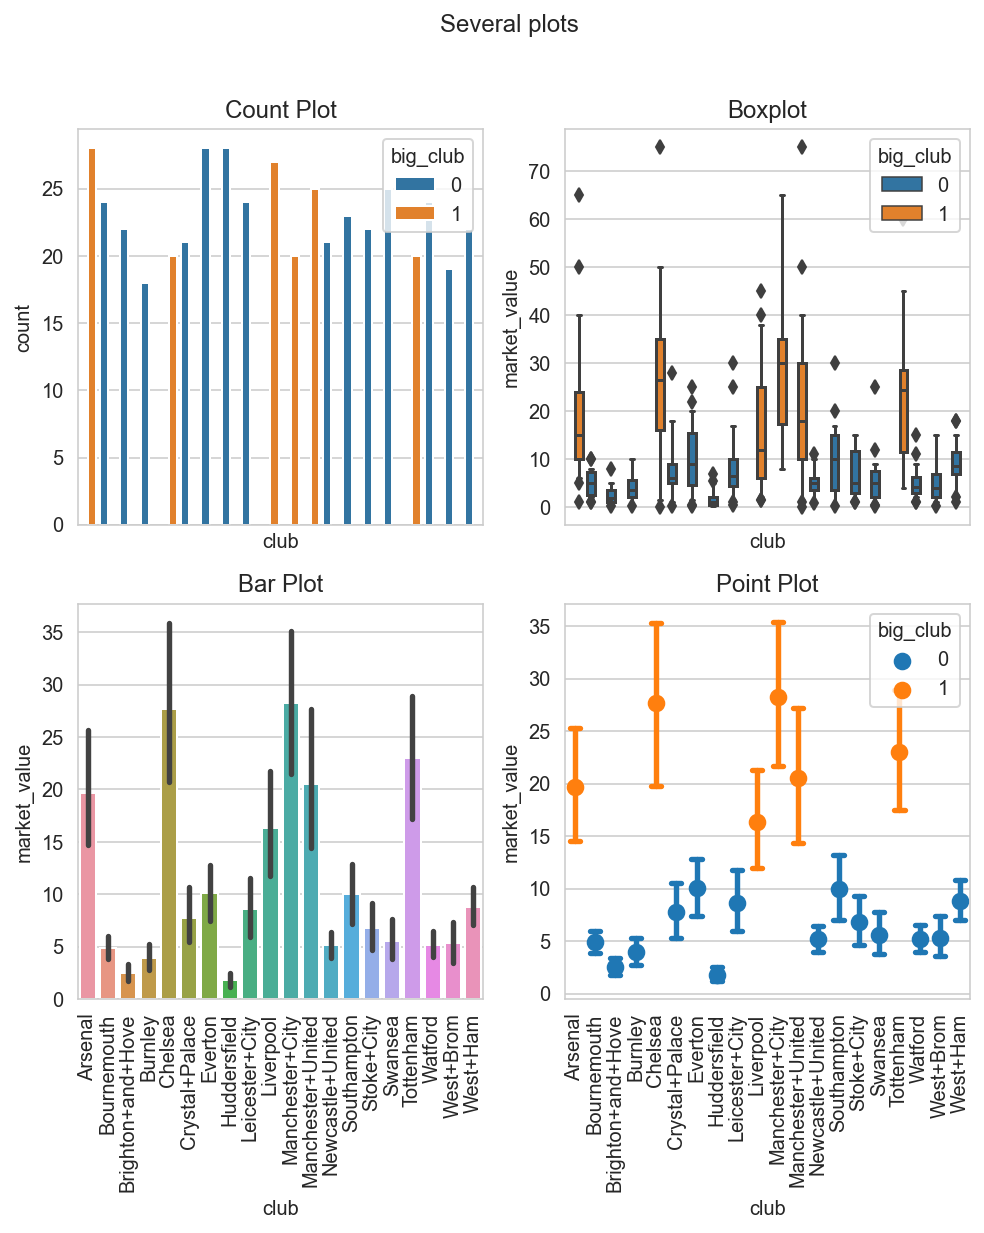

In [28]:
#data: epl1
#a = sns.catplot(x='club', data=epl, kind='count', hue='big_club', col='position_cat', col_wrap=2)

%config InlineBackend.figure_format = 'retina'

sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2,sharex=True,figsize=(8,8))

a= sns.countplot(x='club', data =epl, hue='big_club', ax=ax[0,0])
a = sns.boxplot(x='club', y='market_value', data=epl,  hue='big_club', whis=[5, 95],ax=ax[0,1])
a = sns.barplot(x='club', y='market_value', data=epl,ax=ax[1,0])
a = sns.pointplot(x='club', y='market_value', data=epl, hue='big_club', capsize=0.5, join=False,ax=ax[1,1])

ax[0, 0].set_title('Count Plot')
ax[0, 1].set_title('Boxplot')
ax[1, 0].set_title('Bar Plot')
ax[1, 1].set_title('Point Plot')
ax[1, 0].set_xticklabels(labels=epl['club'].unique(), rotation=90)
ax[1, 1].set_xticklabels(labels=epl['club'].unique(), rotation=90)

plt.suptitle('Several plots')
plt.show()

#catplot 은 facetgrid 하의 명령어. 근데 box, count 등이 앞에 있어야 fig, ax 내에서. 


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
C:\Users\82107\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82107\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82107\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82107\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82107\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46988 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82107\anaconda3\lib\site-packages\matp

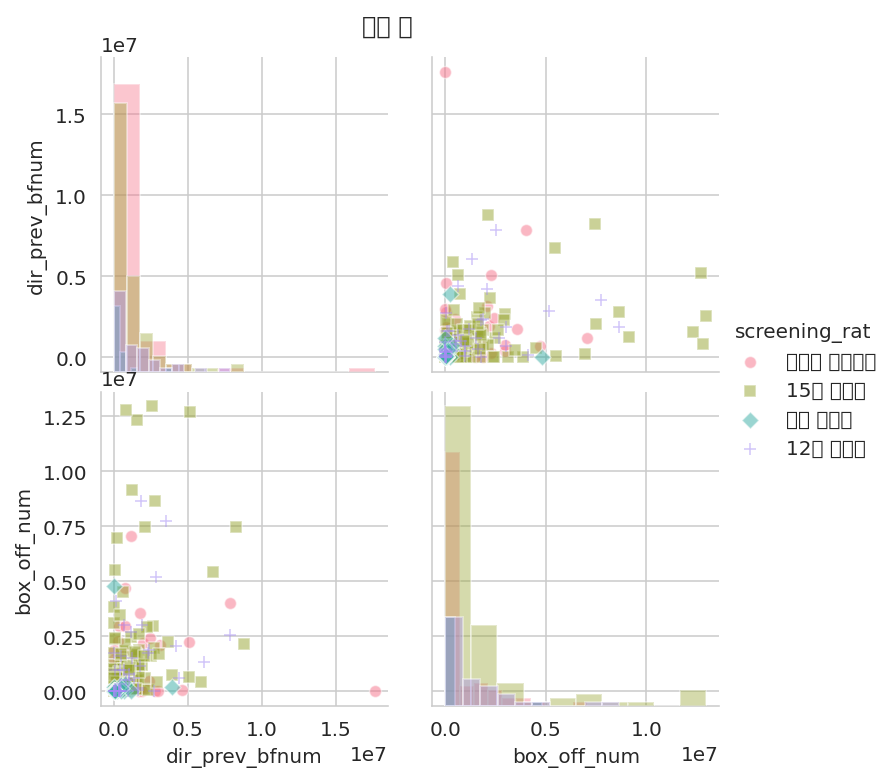

In [29]:
plt.rcParams['font.family']='NanumGothic';plt.rc('axes', unicode_minus=False)

a = sns.pairplot(data=movie[['dir_prev_bfnum', 'box_off_num', 'screening_rat']], hue='screening_rat', diag_kind='hist'
                 ,markers=['o', 's', 'D', '+'],palette='husl', plot_kws = {'alpha':0.5},
                diag_kws = {'alpha':0.4})
a.fig.suptitle('관객 수', x=0.43, y=1.05)
plt.show()

자유롭게 분석하기

In [31]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


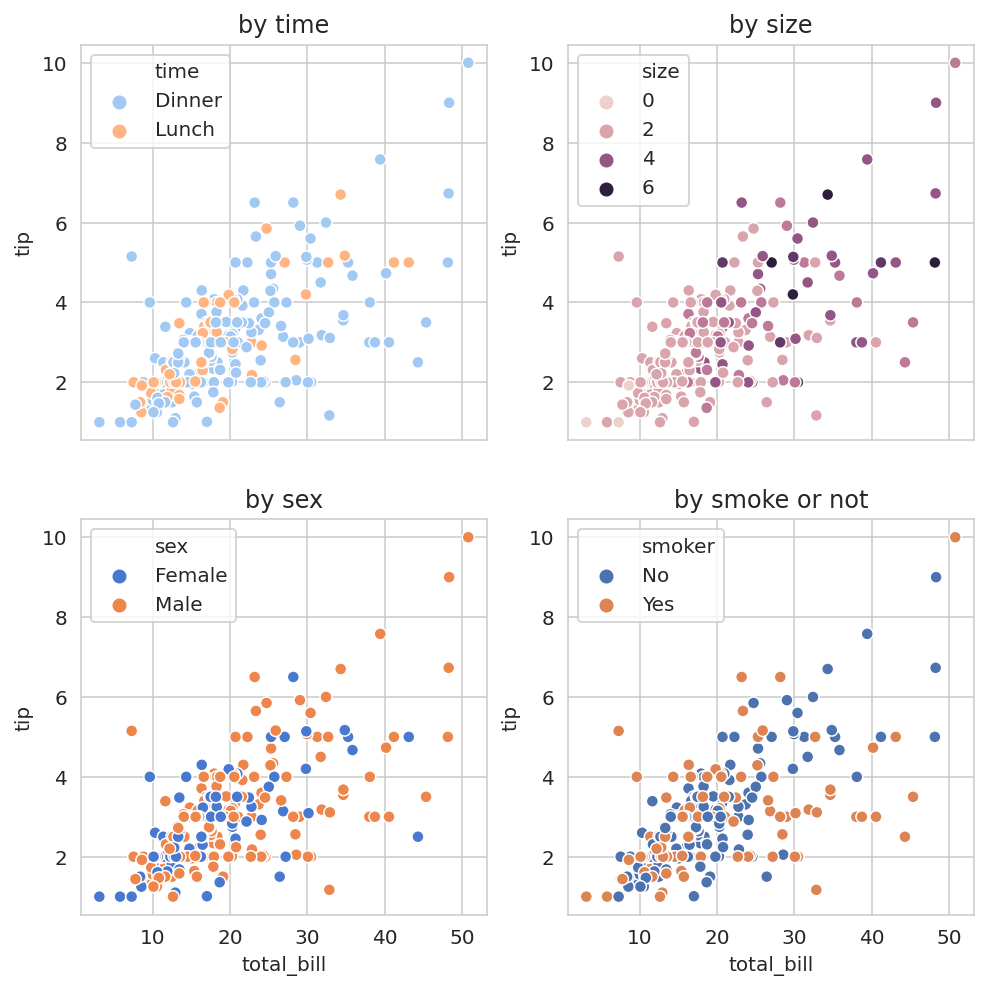

In [57]:
fig, ax = plt.subplots(2,2,sharex=True,figsize=(8,8))

a = sns.scatterplot(x='total_bill', y='tip', data=tips,hue='time',palette='pastel', ax=ax[0, 0])
b= sns.scatterplot(x='total_bill', y='tip', data=tips,hue='size',ax = ax[0, 1])
c = sns.scatterplot(x='total_bill', y='tip', data=tips,hue='sex', palette='muted',ax = ax[1,0])
d = sns.scatterplot(x='total_bill', y='tip', data=tips,hue='smoker', palette='deep',ax = ax[1, 1])

ax[0, 0].set_title('by time')
ax[0, 1].set_title('by size')
ax[1, 0].set_title('by sex')
ax[1, 1].set_title('by smoke or not')

plt.show()

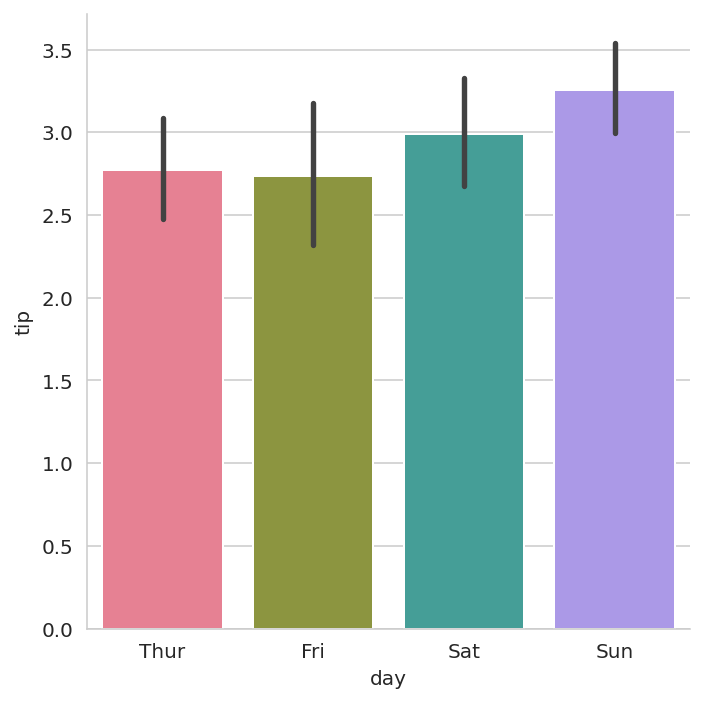

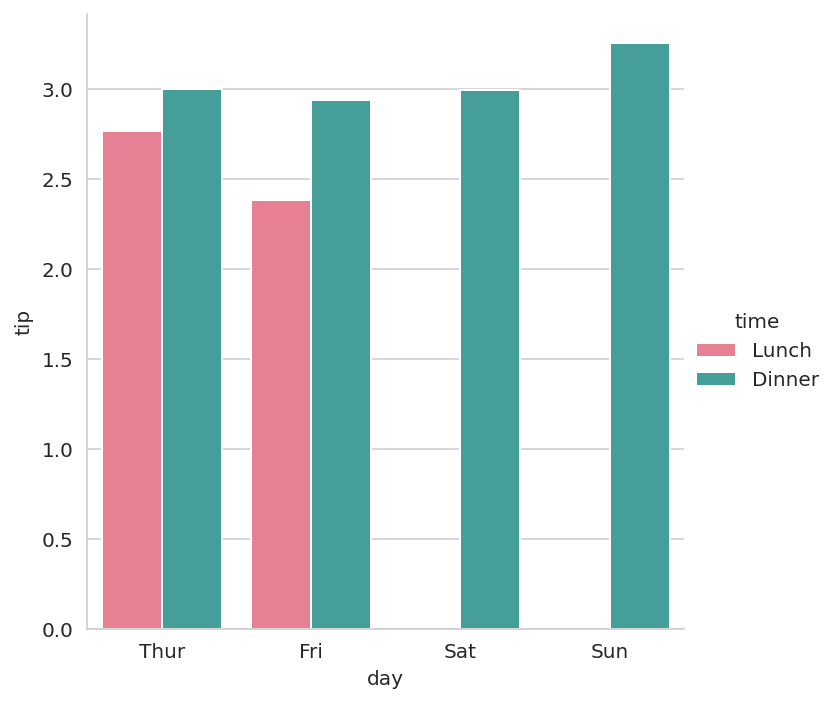

In [40]:
sns.catplot(x='day', y='tip', data=tips, kind='bar',palette='husl')
plt.show()

sns.catplot(x='day', y='tip', data=tips , kind='bar', ci=None, hue='time', palette='husl')
plt.show()

In [44]:
tips_day= tips.set_index('day')
tips_day

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Sun,16.99,1.01,Female,No,Dinner,2
Sun,10.34,1.66,Male,No,Dinner,3
Sun,21.01,3.50,Male,No,Dinner,3
Sun,23.68,3.31,Male,No,Dinner,2
Sun,24.59,3.61,Female,No,Dinner,4
...,...,...,...,...,...,...
Sat,29.03,5.92,Male,No,Dinner,3
Sat,27.18,2.00,Female,Yes,Dinner,2
Sat,22.67,2.00,Male,Yes,Dinner,2


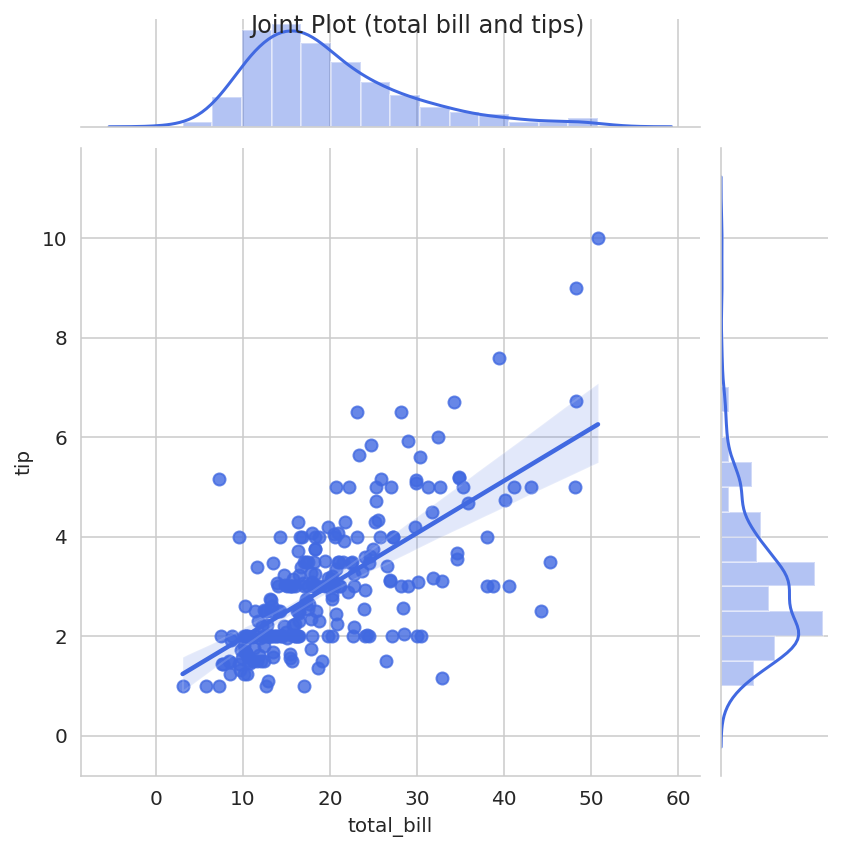

In [58]:
a = sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg', color='royalblue')
a.fig.suptitle('Joint Plot (total bill and tips)')
plt.show()

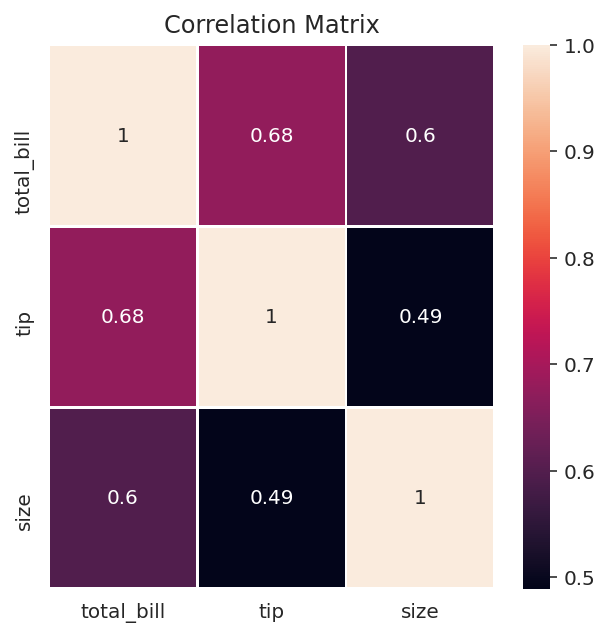

In [51]:
fig, ax = plt.subplots(figsize=(5, 5))

a = sns.heatmap(tips.corr(), annot=True, linewidths=1)
ax.set_title('Correlation Matrix')
plt.show()